In [1]:
import m_ll
import m_tree

print("START")

START


### Linked List

In [2]:
LL_Obj = m_ll.LL(123)
LL_Obj.push_back("ABC")
LL_Obj.push_back("QWERTY")
LL_Obj.push_forword(987)
LL_Obj.print_ll()

LL_Obj.insert_after("ABC", "XYZ")
LL_Obj.del_el(123)
LL_Obj.print_ll()
LL_Obj.ll_length()

987 | 123 | ABC | QWERTY | 
987 | ABC | XYZ | QWERTY | 


4

### Binary Tree

In [3]:
BT_Obj = m_tree.PyBinTree(20)
BT_Obj.add_el(15)
BT_Obj.add_el(17)
BT_Obj.add_el(10)
BT_Obj.add_el(13)
BT_Obj.add_el(30)
BT_Obj.add_el(35)
BT_Obj.add_el(32)
BT_Obj.add_el(25)
BT_Obj.add_el(23)
BT_Obj.add_el(27)

In [4]:
BT_Obj.print_tree()

13
None <- | -> None
10
None <- | ->  13
17
None <- | -> None
15
10  <- | ->  17
23
None <- | -> None
27
None <- | -> None
25
23  <- | ->  27
32
None <- | -> None
35
32  <- | -> None
30
25  <- | ->  35
20
15  <- | ->  30


In [5]:
import pandas as pd

dtTree = pd.DataFrame(BT_Obj.l_plot())
dtTree.columns = ['Level', 'Data', 'Left', 'Right']
dtTree['nLvl'] = dtTree['Level'].astype(int) + 1

dtTree.tail()

,Level,Data,Left,Right,nLvl
6,3,25,23,27,4
7,4,32,32,32,5
8,3,35,32,35,4
9,2,30,25,35,3
10,1,20,15,30,2


In [6]:
def merge(l1, l2):
    ret = [[tuple(l1[i]),tuple(l2[i])] for i in range(0,len(l1))]
    return ret

def df_to_segments(df1, df2):
    df1 = df1.to_records(index=False)
    df1 = list(df1)
    df2 = df2.to_records(index=False)
    df2 = list(df2)
    ret = [[tuple(df1[i]),tuple(df2[i])] for i in range(0,len(df1))]
    ret = list(filter(lambda item: item[0][1] != item[1][1], ret))
    return ret

In [7]:
lLeft = df_to_segments(dtTree[['Level','Data']], dtTree[['nLvl','Left']])
lRight = df_to_segments(dtTree[['Level','Data']], dtTree[['nLvl','Right']])


### Tree visualisation

[10, 13, 15, 17, 20, 23, 25, 27, 30, 32, 35]


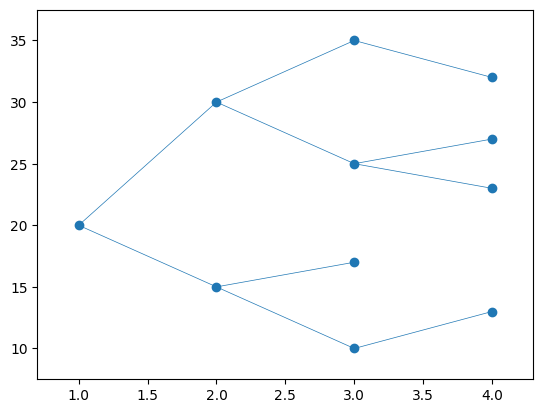

In [8]:
from matplotlib import collections  as mc
import matplotlib.pyplot as pl

lc = mc.LineCollection(lLeft, linewidths=0.5)
rc = mc.LineCollection(lRight, linewidths=0.5)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.add_collection(rc)
ax.scatter(x=dtTree['Level'],y=dtTree['Data'])
ax.autoscale()
ax.margins(0.1)
print(BT_Obj.vectorize_tree())

In [9]:
BT_Obj.balance_tree()
print(BT_Obj.vectorize_tree())

[10, 13, 15, 17, 20, 23, 25, 27, 30, 32, 35]
